In [4]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import seaborn
import sys
import copy
sys.path.append('../')
from utilities.produce_interpretable_tree import produce_interpretable_tree

In [6]:

# Read the CSV file
df = pd.read_csv("./raw_data/paper_metrics.csv")
folder = "results/"

seaborn.set(style = 'whitegrid')  # Set the style for seaborn
save_results = True

# Define the categories
categories = ['average_national_import',  'storage_discharge_capacity', 'transport_electrification', 'heat_electrification',  'biofuel_utilisation']

# Filter the dataframe based on the categories
df = df.loc[df["metric"].isin(categories)]


# Calculate the metrics
n_spores = max(df["spore"]) + 1 
n_metrics = len(categories)

X_header = categories

max_metrics = np.ndarray((1,n_metrics))
for i in range(n_metrics):
    max_metrics[0,i] = df.loc[df["metric"] == X_header[i]]["paper_metrics"].max()

max_df = pd.DataFrame(max_metrics, columns = X_header,index=["max"])


# Normalize the data
X = np.ndarray((n_spores,n_metrics))
for i_spore in range(0,n_spores):
    for j_metrics in range(0,n_metrics):
        X[i_spore,j_metrics] = df.loc[(df["spore"]==i_spore) & (df["metric"]==categories[j_metrics])]["paper_metrics"] / float(max_df[categories[j_metrics]])


df_input_normalized = pd.DataFrame(X, columns = X_header)

print(df_input_normalized)

# %%
if save_results:
    df_input_normalized.to_csv(folder+"df_input_normalized.csv",sep=";")
# %%





C:\Users\olive\AppData\Local\Temp\ipykernel_8196\324147031.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  X[i_spore,j_metrics] = df.loc[(df["spore"]==i_spore) & (df["metric"]==categories[j_metrics])]["paper_metrics"] / float(max_df[categories[j_metrics]])


     average_national_import  storage_discharge_capacity  \
0                   0.433362                    0.115565   
1                   0.433648                    0.117593   
2                   0.321204                    0.708605   
3                   0.318846                    0.731558   
4                   0.573966                    0.046924   
..                       ...                         ...   
436                 0.303532                    0.800171   
437                 0.314759                    0.735607   
438                 0.321495                    1.000000   
439                 0.290790                    0.670054   
440                 0.306289                    0.758051   

     transport_electrification  heat_electrification  biofuel_utilisation  
0                     1.000000              0.985197             0.857936  
1                     0.607053              0.921155             0.999449  
2                     0.997972              0.71085

	imp	st	te	he	bu	
2& 	0& 	0& 	0& 	0& 	1& 	\
3& 	0& 	0& 	0& 	1& 	1& 	\
4& 	0& 	1& 	0& 	1& 	1& 	\
5& 	0& 	1& 	0& 	1& 	2& 	\
6& 	0& 	1& 	0& 	2& 	2& 	\
7& 	0& 	1& 	1& 	2& 	2& 	\
8& 	0& 	2& 	1& 	2& 	2& 	\
9& 	1& 	2& 	1& 	2& 	2& 	\
10& 	2& 	2& 	1& 	2& 	2& 	\
11& 	2& 	2& 	1& 	2& 	3& 	\
12& 	2& 	2& 	1& 	2& 	4& 	\
13& 	2& 	3& 	1& 	2& 	4& 	\
14& 	2& 	3& 	1& 	3& 	4& 	\
15& 	2& 	3& 	1& 	4& 	4& 	\
16& 	2& 	3& 	0& 	5& 	5& 	\
17& 	3& 	3& 	1& 	4& 	5& 	\
18& 	1& 	5& 	1& 	5& 	5& 	\
19& 	2& 	5& 	1& 	5& 	5& 	\
20& 	1& 	7& 	1& 	5& 	5& 	\
21& 	3& 	4& 	1& 	7& 	5& 	\
22& 	5& 	6& 	1& 	4& 	5& 	\
23& 	4& 	6& 	2& 	5& 	5& 	\
24& 	4& 	7& 	2& 	5& 	5& 	\


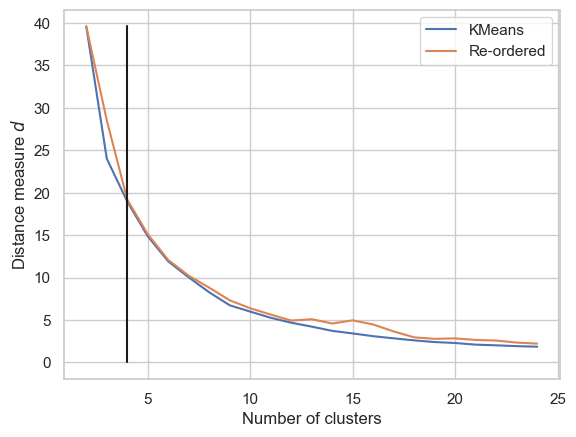

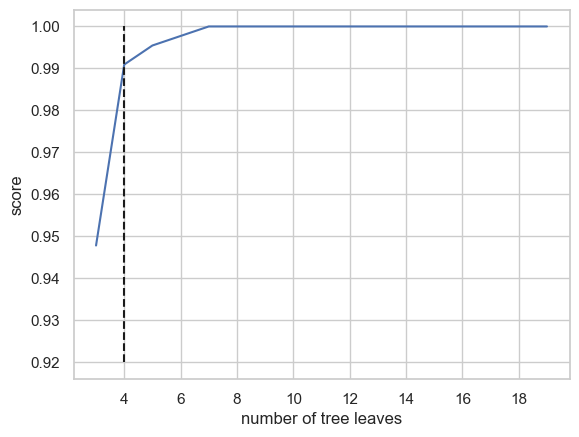

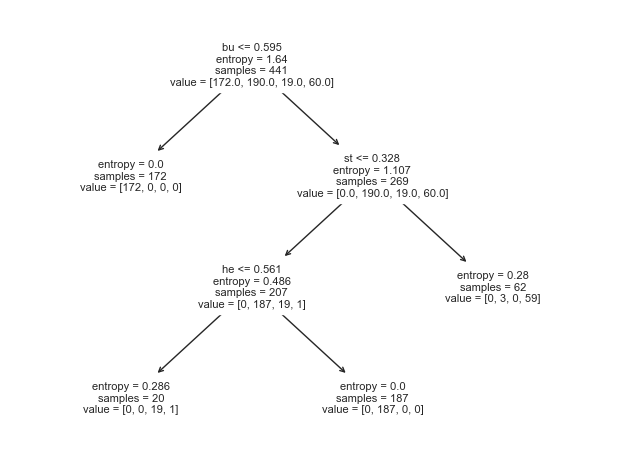

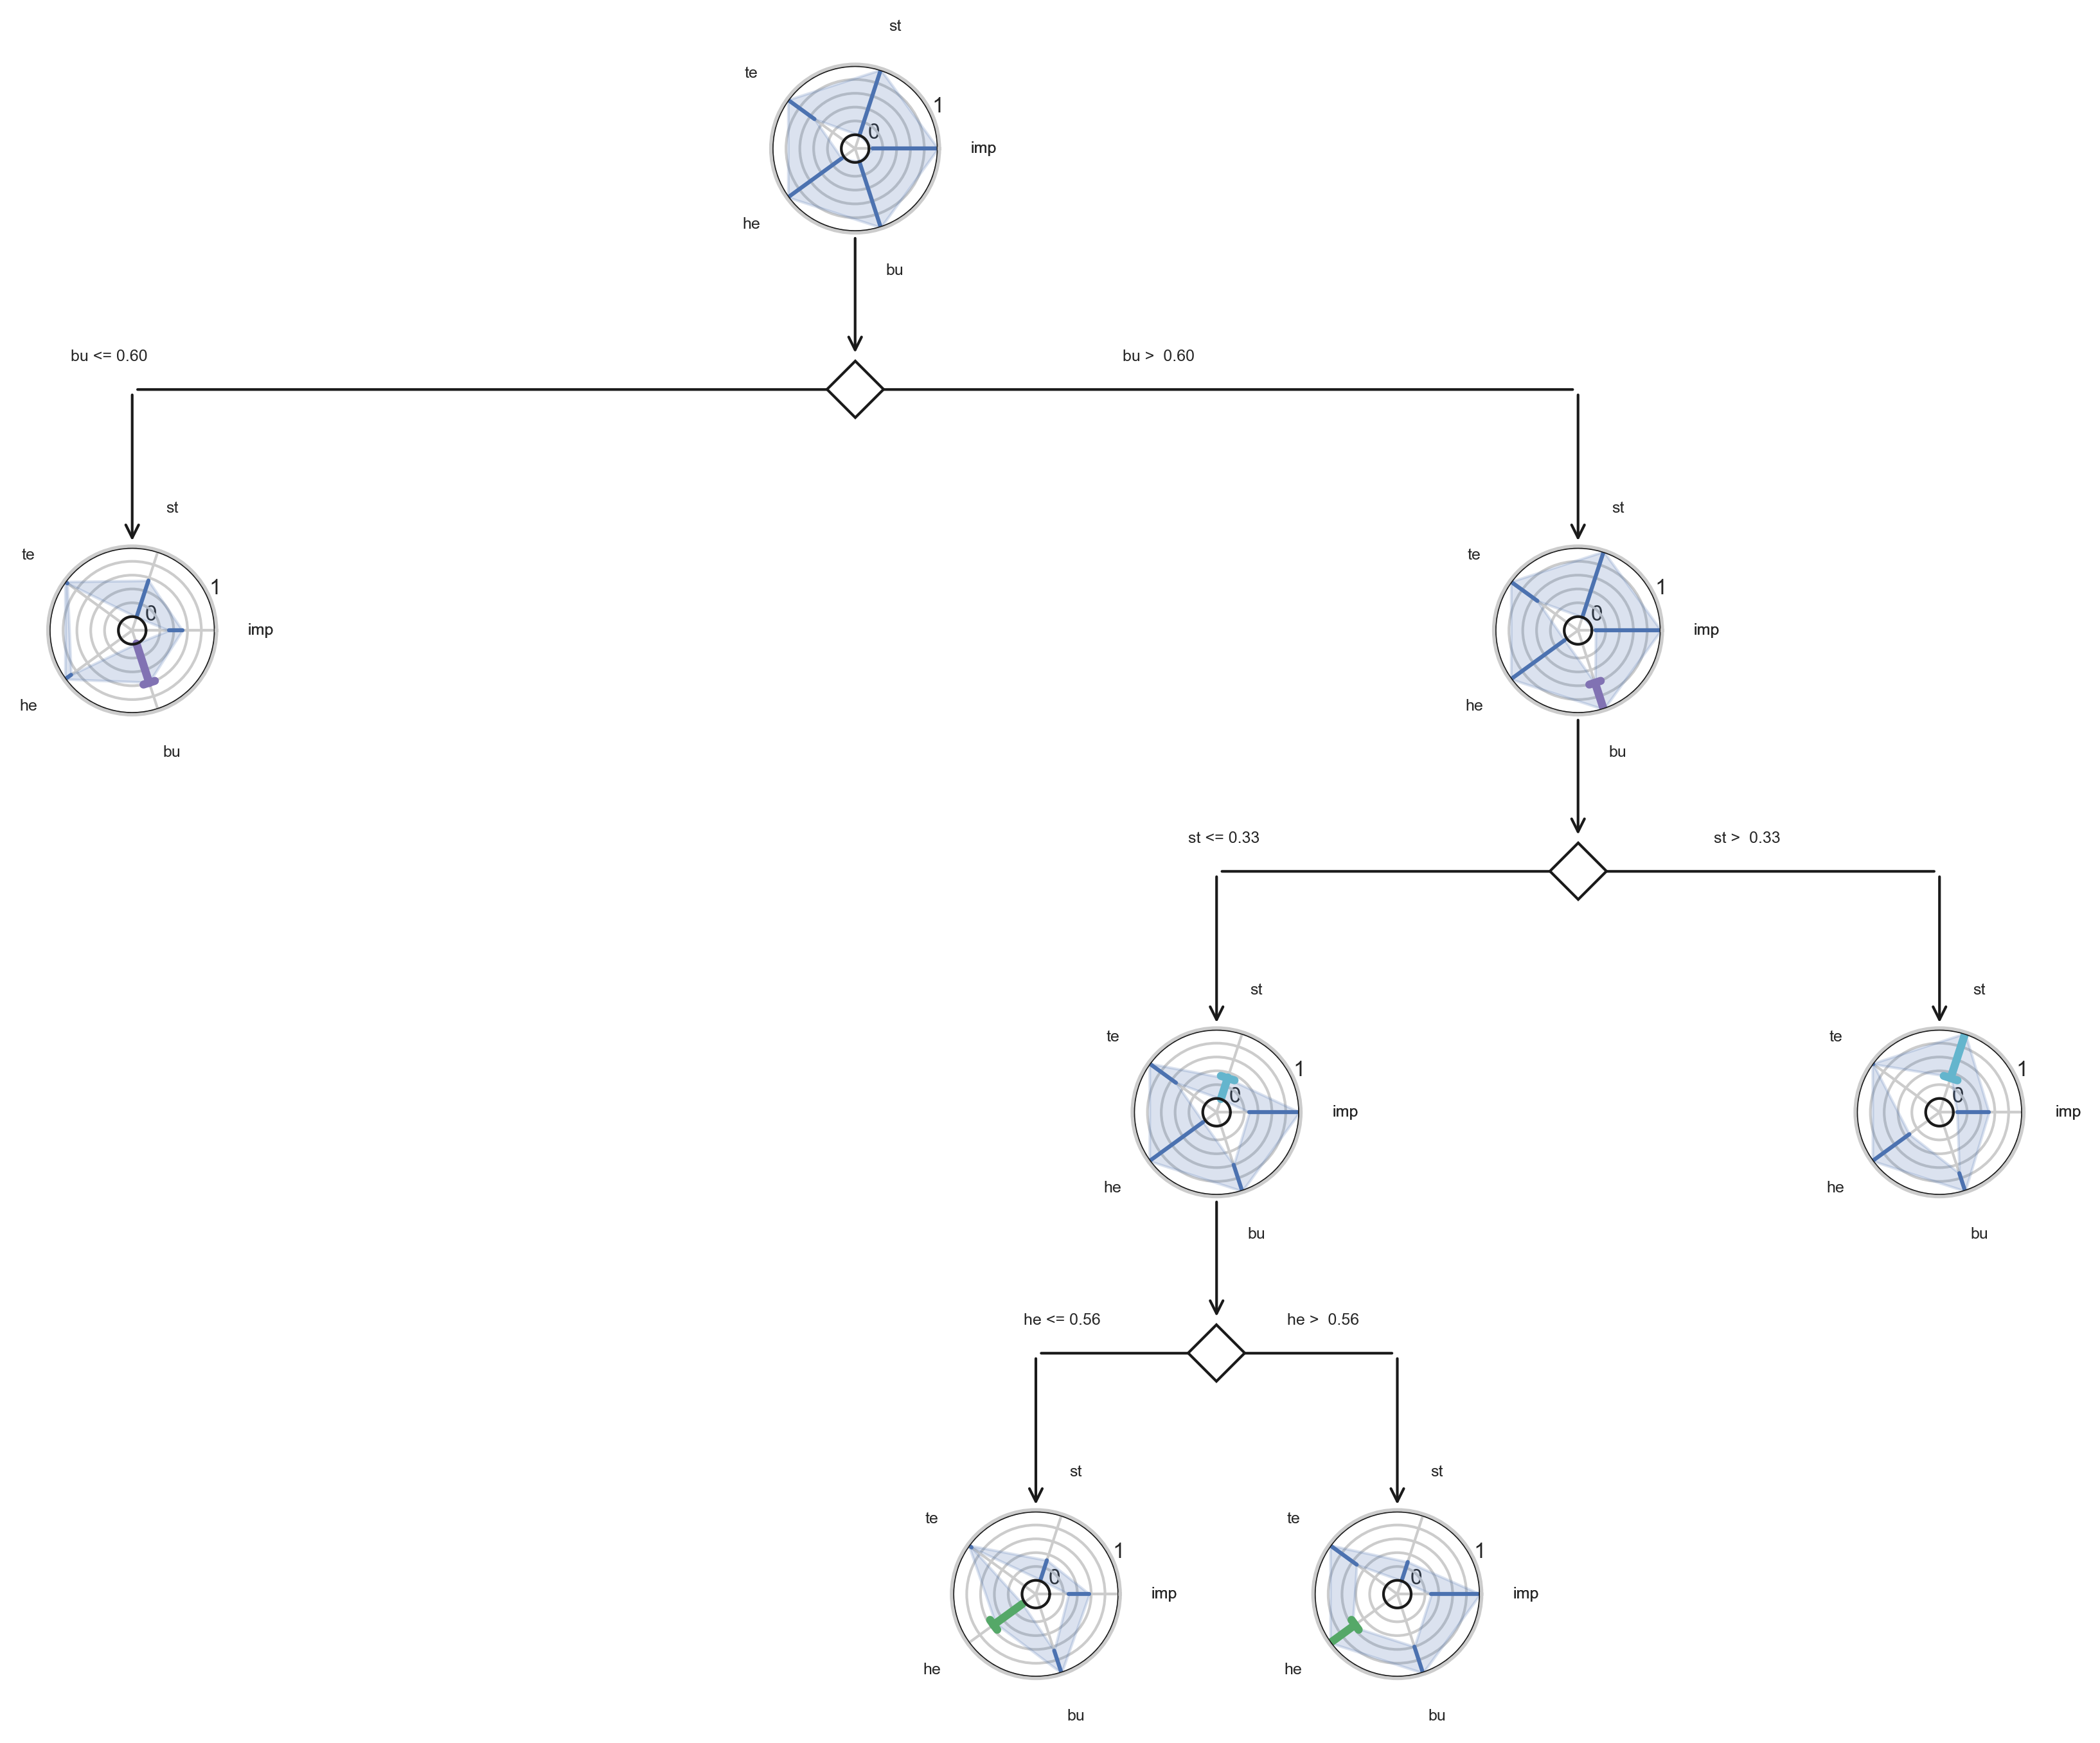

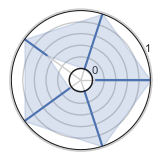

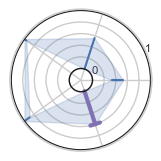

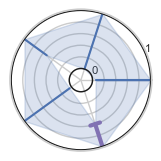

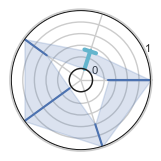

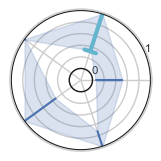

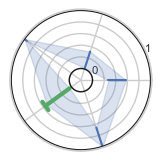

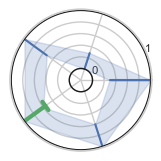

In [7]:
seaborn.set(style = 'whitegrid')  # Set the style for seaborn

n_cl = 4
short_names = ["imp","st","te","he","bu"]

# Set the flag to save the results
save_results = True

# Read the CSV file
folder = "results/"
df_input = pd.read_csv(folder+"df_input_normalized.csv",sep=";")
df_input = df_input.set_index("Unnamed: 0")

# Produce the interpretable tree
df_input_with_final_cluster, nodes, choices, decision_space = produce_interpretable_tree(df_input, short_names,n_cl)

# Save the results
if save_results:
    df_input_with_final_cluster.to_csv(folder+"df_input_with_final_cluster.csv", sep = ";")
    